# Integration using Monte Carlo method

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
"""
This function calculate the integral of a function of a domain [a,b]x[c,d]
using Monte Carlo method 
"""
def ComputeIntegral(NoOfSample, a, b, c, d, g):
    x_i = np.random.uniform(a, b, NoOfSamples)
    y_i = np.random.uniform(c, d, NoOfSamples)
    
    # get the number of point that is below g(x)
    p_i = g(x_i) > y_i
    # get the proportion
    p   = np.sum(p_i) / NoOfSamples
    
    # so the integral = proportion * surface
    integral = p * (b -a) *(d - c)
    
    plt.figure(1)
    plt.plot(x_i, y_i, '.r')
    plt.plot(x_i, g(x_i), '.b')
    
    return integral

In [10]:
"""
Another way of thinking of Monte Carlo method
"""
def ComputeIntegral2(NoOfSamples, a, b, g):
    x_i = np.random.uniform(a, b, NoOfSamples)
    
    p = (b - a) * np.mean(g(x_i))
    
    return p

Integral from Monte Carlo 1 is 1.7466000000000002
Integral from Monte Carlo 2 is 1.7278603935972359
Integral computed analytically = 1.718281828459045


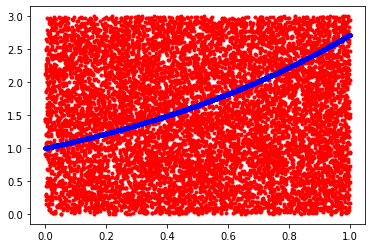

In [11]:
NoOfSamples = 10000
a = 0
b = 1
c = 0
d = 3

g = lambda x: np.exp(x)
output = ComputeIntegral(NoOfSamples, a, b, c, d, g)

print('Integral from Monte Carlo 1 is {0}'.format(output))

output2 = ComputeIntegral2(NoOfSamples, a, b, g)

print('Integral from Monte Carlo 2 is {0}'.format(output2))
print('Integral computed analytically = {0}'.format(np.exp(b)-np.exp(a)))


The variance of the first approach is much higher than the second one but when N number of points increase it also converges

# Exemples of Stochastic Integrals

## Exercise 1  
For a given deterministic function g(t) determine :  
    G(T) =  $\int_{0}^{T} g(s)dW(s)$ with g(t) = t^2

In [12]:
def ComputeIntegrals(NoOfPaths, NoOfSteps, T, g):
    Z  = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W  = np.zeros([NoOfPaths, NoOfSteps + 1])
    I1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
        W[:, i + 1]  = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        
        I1[:, i + 1] = I1[:, i] + g(time[i]) * (W[:, i + 1] - W[:, i])
        time[i + 1]  = time[i] + dt
        
    paths = {"time": time, "W": W, "I1": I1}
    
    return paths

Mean = -1.0302869668521452e-17 and variance =0.19434777967505357


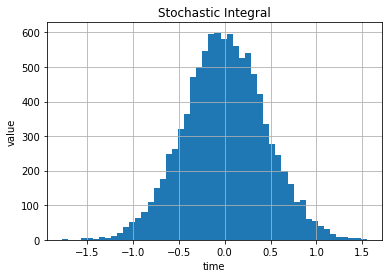

In [13]:
NoOfPaths = 10000
NoOfSteps = 1000
T = 1

g = lambda t : t**2

output   = ComputeIntegrals(NoOfPaths, NoOfSteps, T, g)
timegrid = output["time"]
G_T = output["I1"]

plt.figure(1)
plt.grid()
plt.hist(G_T[:, -1], 50)
plt.xlabel("time")
plt.ylabel("value")
plt.title("Stochastic Integral")

EX  = np.mean(G_T[:, -1])
Var = np.var(G_T[:,-1])
print('Mean = {0} and variance ={1}'.format(EX,Var))

## Exercise 2 
For a given Brownian motion W(t) determine  
    G(T) = $\int_{0}^{T}W(s)dW(s)$

In [15]:
def ComputeIntegrals_2(NoOfPaths, NoOfSteps, T, g):
    Z  = np.random.normal(0, 1, [NoOfPaths, NoOfSteps])
    W  = np.zeros([NoOfPaths, NoOfSteps + 1])
    I1 = np.zeros([NoOfPaths, NoOfSteps + 1])
    time = np.zeros([NoOfSteps + 1])
    
    dt = T / float(NoOfSteps)
    
    for i in range(0, NoOfSteps):
        # Making sure that samples from normal have mean 0 and variance 1
        if NoOfPaths > 1:
            Z[:, i] = (Z[:, i] - np.mean(Z[:, i])) / np.std(Z[:, i])
            
        W[:, i + 1]  = W[:, i] + np.power(dt, 0.5) * Z[:, i]
        
        # Different from Ex 1 g(W(t))
        I1[:, i + 1] = I1[:, i] + g(W[:, i]) * (W[:, i + 1] - W[:, i])
        time[i + 1]  = time[i] + dt
        
    paths = {"time": time, "W": W, "I1": I1}
    
    return paths

Mean = 0.002778358762546193 and variance =2.094612435112262


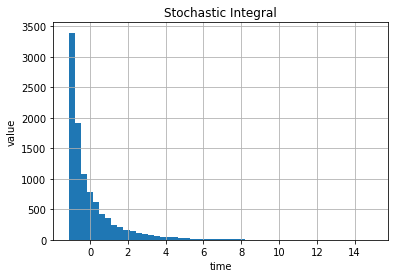

In [17]:
NoOfPaths = 10000
NoOfSteps = 1000
T = 2

g = lambda t : t

output   = ComputeIntegrals_2(NoOfPaths, NoOfSteps, T, g)
timegrid = output["time"]
G_T = output["I1"]

plt.figure(1)
plt.grid()
plt.hist(G_T[:, -1], 50)
plt.xlabel("time")
plt.ylabel("value")
plt.title("Stochastic Integral")

EX  = np.mean(G_T[:, -1])
Var = np.var(G_T[:,-1])
print('Mean = {0} and variance ={1}'.format(EX,Var))